In [1]:
import os, sys; sys.path.append(os.path.abspath('../'))

# Crawl the data directory
import os

data_dir = r'..\data\baseline'

data_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mat')]
# loop over the files

import scipy.io

All_network_X = []
All_network_y = []

for f in data_files[:10]:
    data = scipy.io.loadmat(f)
    test_x = data['test_x']
    test_out = data['test_out']

    All_network_X.append(test_x)
    All_network_y.append(test_out)

import numpy as np

All_network_X = np.array(All_network_X)
All_network_y = np.array(All_network_y)

In [3]:
All_network_X.shape

(10, 4, 50, 200, 300)

In [5]:
from sklearn.metrics import pairwise_distances
results = []
# metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
for model in All_network_X:
    x = model.reshape(4, -1)
    result = pairwise_distances(x, Y=x, metric="l2")
    results.append(result)

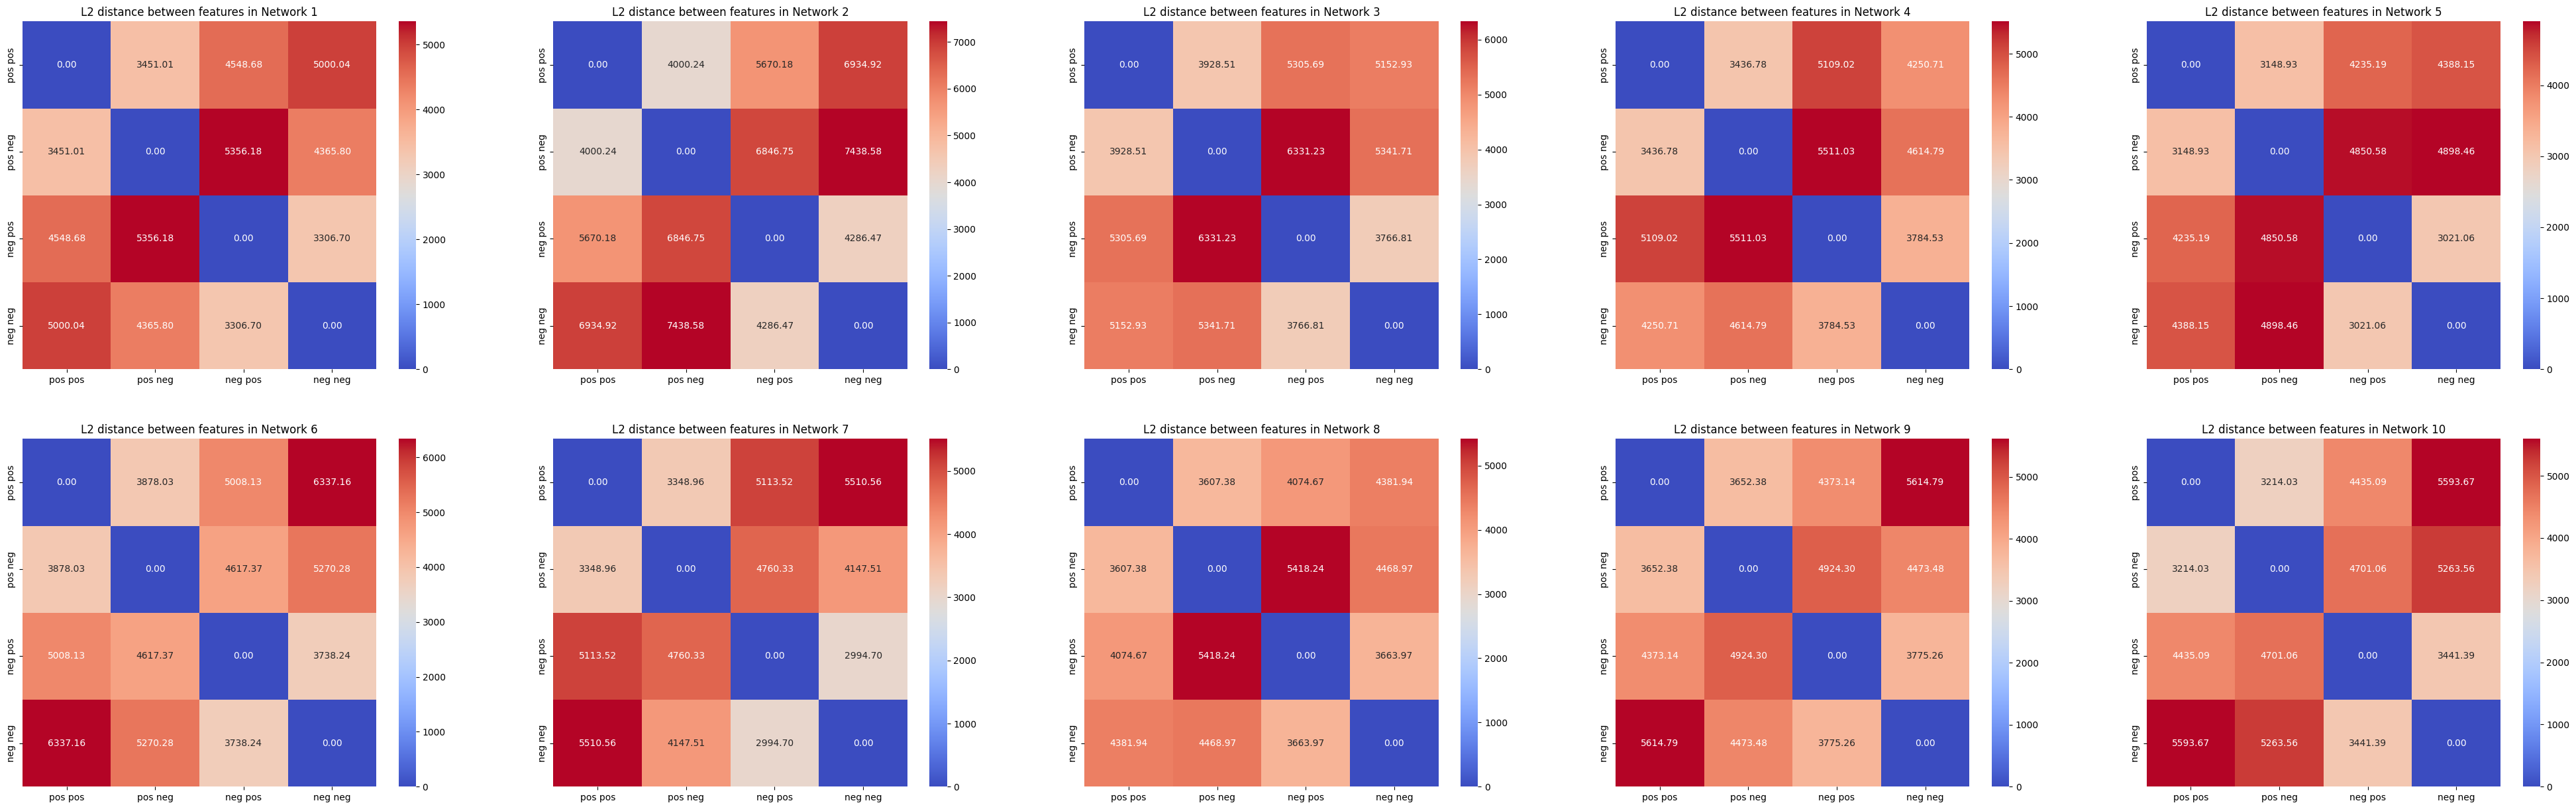

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['pos pos', 'pos neg', 'neg pos', 'neg neg']

fig, axes = plt.subplots(2, 5, figsize=(50, 15))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(results[i], ax=ax, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
    ax.set_title(f"L2 distance between features in Network {i+1}")

In [31]:
from sklearn.metrics import pairwise_distances
# metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
x = All_network_X.transpose(1, 0, 2, 3, 4).reshape(4, -1)
result = pairwise_distances(x, Y=x, metric="l2")

In [32]:
result.shape

(4, 4)

[]

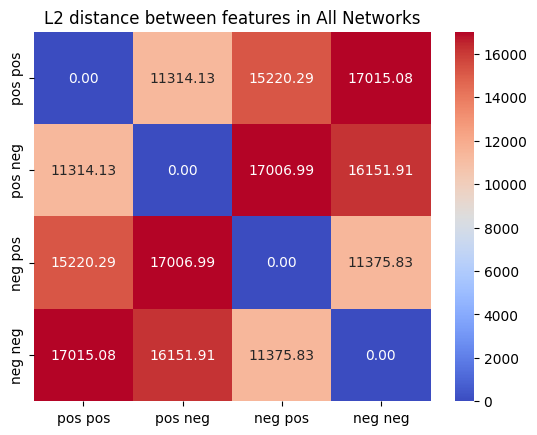

In [33]:
# plot the result
import seaborn as sns
from matplotlib import pyplot as plt

labels = ['pos pos', 'pos neg', 'neg pos', 'neg neg']
plt.figure()
ax = sns.heatmap(result, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
ax.set_title(f"L2 distance between features in All Networks")
plt.plot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['pos pos', 'pos neg', 'neg pos', 'neg neg']

fig, axes = plt.subplots(2, 5, figsize=(50, 15))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(results[i], ax=ax, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
    ax.set_title(f"L2 distance between features in Network {i+1}")